In [160]:
from PIL import Image
import random

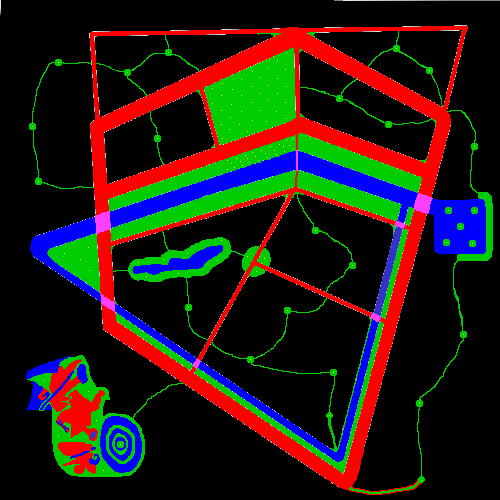

In [161]:
fasnacht = Image.open('fasnacht.png')
fasnacht

In [162]:
X,Y = fasnacht.size
height = 20
h0 = 0
p = 1/3
q = 1/15

pairs = []
for p1 in ['air','nyancat','nyancat_rainbow','meselamp']:
    for p2 in ['air','nyancat','nyancat_rainbow','meselamp']:
        if p1!=p2:
            pairs.append((p1,p2))

In [163]:
def colour(rgb):
    r,g,b,_ = rgb
    if r>2*g and r>2*b:
        return ['r']
    elif g>2*r and g>2*b:
        return ['g']
    elif b>2*r and b>2*g:
        return ['b']
    elif r>2*g and b>2*g:
        return ['r','b']
    elif r>2*b and g>2*b:
        return ['r','g']
    elif r<32 and g<32 and b<32:
        return ['s']
    else:
        return []
    

blocks = {}
for x in range(X):
    for y in range(Y):
        
        c = colour(fasnacht.getpixel((x,y)))
        
        if 'b' in c:
            blocks[x,y,1+h0] = 'water_source'
        
        if 'r' in c and 'g' not in c:
            if 'b' in c:
                blocks[x,y,3+h0] = 'stonebrick'
            else:
                for z in range(1+h0,3+h0):
                    blocks[x,y,z] = random.choice(['cobble','mossycobble'])
            if (x+y)%2==0:
                if random.random()<q:
                    dh = int('b' in c)
                    lantern = random.choice(['nyancat','nyancat_rainbow','meselamp'])
                    if lantern in ['mese_post_light','torch']:
                        h = 1
                    else:
                        h = 3
                    for z in range(3+h0+dh,3+h+h0+dh):
                        blocks[x,y,z] = 'fence_wood'
                    blocks[x,y,3+h+h0+dh] = lantern
                    
            
        if 'g' in c or c==[]:
            for z in range(1+h0,3+h0):
                blocks[x,y,z] = 'dirt_with_grass'
            if random.random()<p:
                if (x,y,3+h0) not in blocks:
                    blocks[x,y,3+h0] = 'grass_1'
            if 'r' in c:
                pair = random.choice(pairs)
                for dx in [-1,0,1]:
                    for dy in [-1,0,1]:
                        blocks[x+dx,y+dy,3+h0] = 'junglewood'
                    for dz in range(3):
                        blocks[x+dx,y,4+h0+dz] = pair[(dx+dz)%2]
                
        if 's' in c:
            for z in range(1+h0,3+h0):
                blocks[x,y,z] = 'dirt'
            edge = x in [0,1,X-2,X-1] or y in [0,1,X-2,Y-1]
            if (x+y)%2==0 or edge:
                if random.random()<p or edge:
                    if edge:
                        wood = random.choice(['tree','jungletree','aspen_tree'])
                        h = int(3+(random.random()+3)*(height-3)/4)
                    else:
                        wood = random.choice(['tree','jungletree','aspen_tree','aspen_leaves'])
                        h = int(3+(2*random.random()+1)*(height-3)/3)
                    for z in range(3+h0,h):
                        blocks[x,y,z] = wood
                elif random.random()<p:
                    blocks[x,y,3+h0] = 'dry_shrub'
                    
            else:
                if random.random()<q:
                    blocks[x,y,2+h0] = 'mese'
                elif random.random()<p:
                    blocks[x,y,3+h0] = 'dry_shrub'
                

x,y = int(X/2),int(Y/2)
player = 421,height,24
with open('blocks.csv','w') as file:
    file.write( '0,0,0,min,\n' )
    file.write( str(X)+','+str(height+2)+','+str(Y)+','+'max'+',\n' )
    file.write( str(player[0])+','+str(player[1])+','+str(Y-player[2])+','+'player'+',\n' )
    for (x,y,z) in blocks:
        file.write( str(x)+','+str(z)+','+str(y)+','+blocks[x,y,z]+',\n' )      
        



